# Aman Chopra

# The Sparks Foundation

## Griptask 1: Predict the percentage of an student based on the number of study hours

## Importing the required libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
print("Libraries imported succesfully")

Libraries imported succesfully


## Reading the data from online source

In [5]:
url="http://bit.ly/w-data"
df=pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


## Data Exploration

In [6]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [9]:
# Checking for any missing value
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [10]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [12]:
# Checking the correlation between hours and scores
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


This shows higher correlation between hours and scores

## Data Visualization

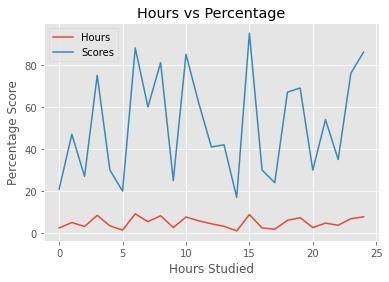

In [17]:
# Visualizing using line plot
plt.style.use('ggplot')
df.plot(kind='line')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

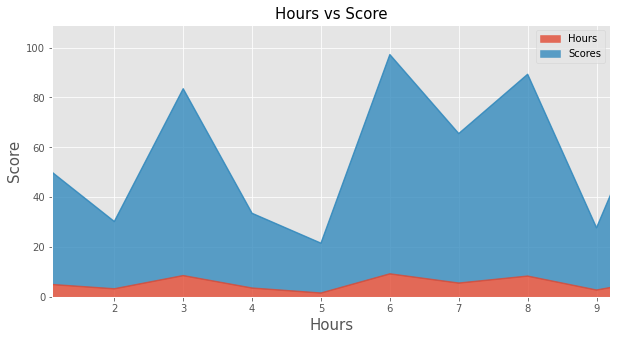

In [19]:
# Visualizing with area plot

xmin=min(df.Hours)
xmax=max(df.Hours)
df.plot(kind='area',alpha=0.8,stacked=True,figsize=(10,5),xlim=(xmin,xmax))
plt.title('Hours vs Score',size=15)
plt.xlabel('Hours',size=15)
plt.ylabel('Score',size=15)
plt.show()

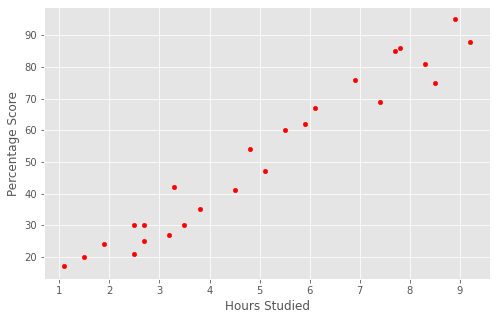

In [21]:
# Visualizing with scatter plot
df.plot(kind='scatter',x='Hours',y='Scores',color='r',figsize=(8,5))
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

By visualization we came to know that this problem can be easily solved by linear regression

## Modelling the data

In [28]:
x=np.asanyarray(df[['Hours']])
y=np.asanyarray(df[['Scores']])

# using train test split to split the data into train and test data
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=2)

regressor=LinearRegression()
regressor.fit(train_x,train_y)

print('Training completed\n')
print('Coefficients: ',regressor.coef_)
print('Intercept: ',regressor.intercept_)


Training completed

Coefficients:  [[9.94061514]]
Intercept:  [1.50791048]


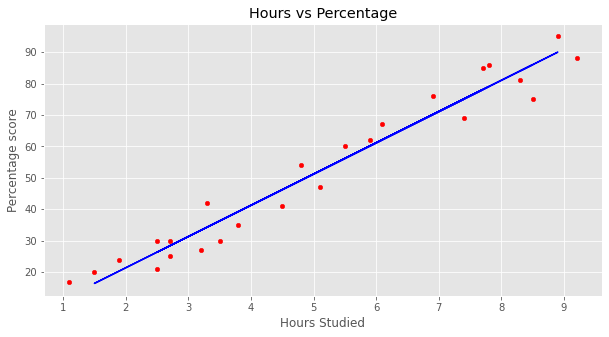

In [33]:
# we can also plot the fit line over the data in single Linear regression

df.plot(kind='scatter',x='Hours',y='Scores',figsize=(10,5),color='r')
plt.plot(train_x,regressor.coef_[0]*train_x + regressor.intercept_,color='b')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage score')
plt.show()

The blue line is the best fit line for this data

## Evaluation of the model

In [34]:
# using metrics to find mean absolute error and r2 to see the accuracy

from sklearn import metrics
from sklearn.metrics import r2_score

y_pred=regressor.predict(test_x)
print('Mean Absolute Error : {}'.format(metrics.mean_absolute_error(y_pred,test_y)))
print("R2-score %.2f" % r2_score(y_pred,test_y))

Mean Absolute Error : 4.877039354964484
R2-score 0.98


Mean Absolute Error: It is mean of absolute value of errors

r2-score:It is not the error but its the metric for accuracy for the model. Higher the r2 value higher is the accuracy 
of model. Best score is 1

In [47]:
# Comparing actual vs predicted

df2 = pd.DataFrame({'Actual':[test_y],'Predicted':[y_pred]})
df2
pd.DataFrame(np.c_[test_y,y_pred],columns=['Actual','Predicted'])

,Actual,Predicted
0,17.0,12.442587
1,21.0,26.359448
2,24.0,20.395079
3,88.0,92.961570
4,76.0,70.098155


## Predicting the Score with single input value

In [37]:
hours=9.25
predicted_score=regressor.predict([[hours]])

print(f'No. of hours = {hours}')
print(f'predicted Score = {predicted_score[0]}')

No. of hours = 9.25
predicted Score = [93.45860056]
